# Importing the Dataset

In [1]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
train_df = pd.read_parquet("hf://datasets/mediabiasgroup/BABE/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/mediabiasgroup/BABE/" + splits["test"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


https://github.com/Media-Bias-Group/Neural-Media-Bias-Detection-Using-Distant-Supervision-With-BABE


In [2]:
train_df.head()

,text,news_link,label,outlet,topic,type,label_opinion,biased_words,uuid
0,NYPD Commissioner Dermot Shea on Monday expres...,http://feedproxy.google.com/~r/breitbart/~3/F5...,0,Breitbart,marriage-equality,None,Entirely factual,[],GtvFWZmmQmybyeMnb8Wbsr
1,School systems across the country are adopting...,https://thefederalist.com/2020/07/08/black-liv...,1,Federalist,islam,None,Expresses writer’s opinion,"['indoctrinating', 'Marxist', 'alarming']",mvoQPtabs6NZbby6LkLbms
2,"And then along came President Barry Obama, who...",http://feedproxy.google.com/~r/breitbart/~3/ks...,1,Breitbart,marriage-equality,None,Expresses writer’s opinion,"['what', 'the', 'hell']",RDWPbijx3n2aw6NiMHt7di
3,"The curfews, which have never before occurred ...",https://www.alternet.org/2020/06/we-just-got-a...,1,Alternet,elections-2020,left,Entirely factual,"['false', 'claims']",2uYKw5KpXasJWH65WCjSu4
4,"Rather than help be a part of the solution, Tr...",https://www.alternet.org/2020/06/trump-thought...,1,Alternet,elections-2020,left,Expresses writer’s opinion,['racist'],SRGvrzY9PkvtHESdts35Rw


In [3]:
test_df.head()

,text,news_link,label,outlet,topic,type,label_opinion,biased_words,uuid
0,"As the Black Lives Matter movement grows, comp...",https://www.foxnews.com/us/juneteenth-calls-in...,0,Fox News,marriage-equality,None,Entirely factual,[],ayLcFCbNshSG5zjdXTQHGH
1,The case of Rahaf Mohammed al-Qunun drawn new ...,https://www.reuters.com/article/us-thailand-sa...,0,Reuters,gender,center,Entirely factual,[],4QADvLi4RqLNtzkM9rCmS3
2,The Post said the talks on payroll taxes were ...,https://www.reuters.com/article/us-usa-economy...,0,Reuters,taxes,center,Entirely factual,[],nAprfpSfXPNX3WvMFvADd7
3,Nearly 78 percent of Americans report experien...,https://www.thedailybeast.com/climate-disaster...,0,The Daily Beast,environment,None,None,None,yQsHy6FPz5cq92SE22Rwhj
4,Colin P. Clarke has been teaching a course on ...,https://eu.usatoday.com/story/news/nation/2020...,0,USA Today,white-nationalism,center,Entirely factual,[],h4qCzqXRwgh5JyVBykCJFv


## Data Exploration

In [4]:
train_df.shape

(3121, 9)

In [5]:
test_df.shape

(1000, 9)

In [6]:
# Calculate null values, data types, and % of null values for each column
null_values = train_df.isnull().sum()
data_types = train_df.dtypes
null_percentage = round((null_values / len(train_df)) * 100,1)

column_info = pd.DataFrame({
    'Null Values': null_values,
    'Null Percentage (%)': null_percentage,
    'Data Type': data_types
})

print("Null values, null percentage, and data types for each column:")
print(column_info)


Null values, null percentage, and data types for each column:
               Null Values  Null Percentage (%) Data Type
text                     0                  0.0    object
news_link               22                  0.7    object
label                    0                  0.0     int32
outlet                   0                  0.0    object
topic                    0                  0.0    object
type                  1095                 35.1    object
label_opinion          341                 10.9    object
biased_words           341                 10.9    object
uuid                     0                  0.0    object


In [7]:
label_mapping = {"right": 0, "left": 1, "center": 2}
# Remove None values in 'type' column
train_df = train_df.dropna(subset=['type']).copy()
test_df = test_df.dropna(subset=['type']).copy()
train_df.loc[:, 'type'] = train_df['type'].map(label_mapping).astype(int)
test_df.loc[:, 'type'] = test_df['type'].map(label_mapping).astype(int)

In [8]:
train_df.shape

(2026, 9)

In [9]:
test_df.shape

(646, 9)

In [10]:
train_df['type'].value_counts()

,count
type,
0,759
1,749
2,518


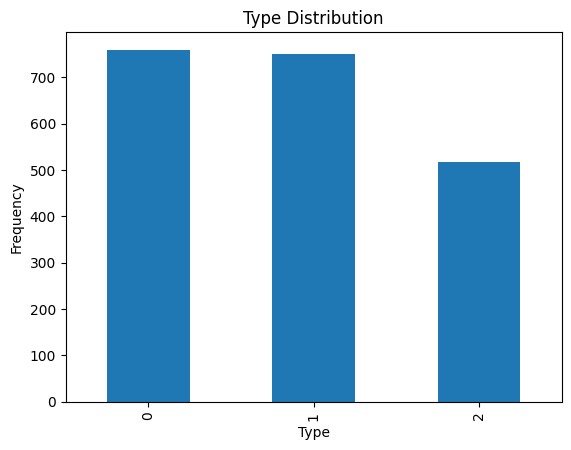

In [11]:
import matplotlib.pyplot as plt
type_counts = train_df['type'].value_counts()
type_counts.plot(kind='bar')
plt.title("Type Distribution")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.show()

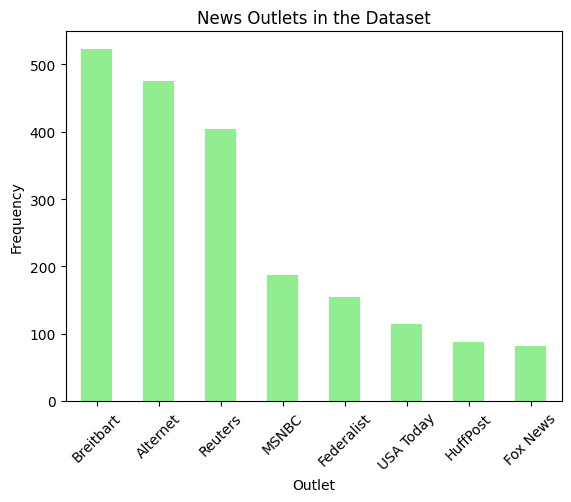

In [12]:
outlet_counts = train_df['outlet'].value_counts()
outlet_counts.plot(kind='bar', color='lightgreen')
plt.title("News Outlets in the Dataset")
plt.xlabel("Outlet")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [13]:
train_df['topic'].value_counts()

,count
topic,
black lives matter,212
taxes,179
universal health care,165
gun control,157
gender,102
white-nationalism,100
student-debt,100
sport,98
environment,97


In [14]:
from collections import Counter
biased_words_list = []

for entry in train_df['biased_words']:
    # Check if the entry is a list and not empty
    if isinstance(entry, list) and entry:
        biased_words_list.extend(entry)
    # If it's a string, split it by commas
    elif isinstance(entry, str) and entry:
        biased_words_list.extend(entry.strip("[]").replace("'", "").split(", "))

# occurrences of each biased word
biased_word_counts = Counter(biased_words_list)
top_biased_words = dict(biased_word_counts.most_common(20))

# distinct list of top 20 biased words and their counts
print("Top 20 Biased Words and Counts:")
for word, count in top_biased_words.items():
    print(f"{word}: {count}")

Top 20 Biased Words and Counts:
: 1002
claiming: 24
illegal: 19
aliens: 19
claim: 18
claimed: 18
claims: 16
the: 14
of: 12
out: 11
radical: 9
mob: 9
leftist: 9
racist: 8
toxic: 8
slammed: 8
up: 8
dramatic: 8
lies: 7
white: 7


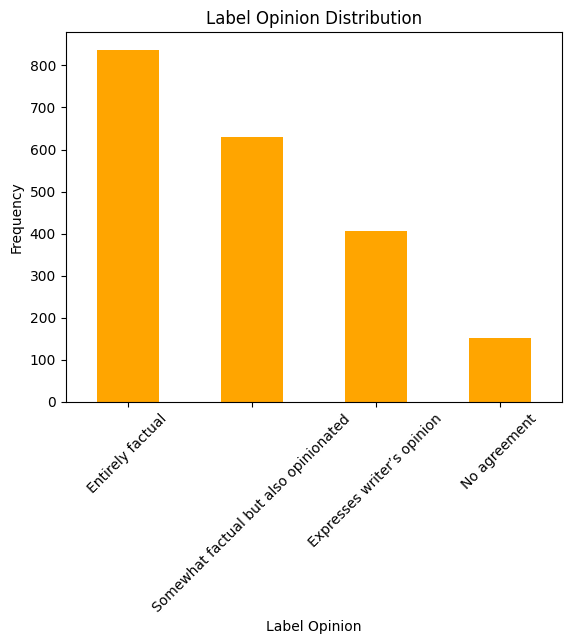

In [15]:
# label_opinion distribution
opinion_counts = train_df['label_opinion'].value_counts()
opinion_counts.plot(kind='bar', color='orange')
plt.title("Label Opinion Distribution")
plt.xlabel("Label Opinion")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

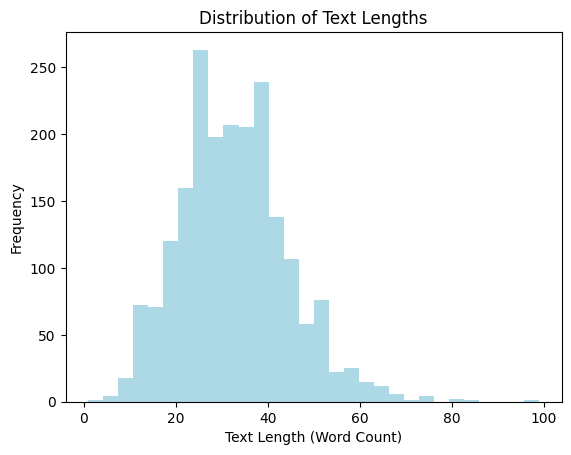

In [16]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
# histogram of text lengths
train_df['text_length'].plot(kind='hist', bins=30, color='lightblue')
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length (Word Count)")
plt.ylabel("Frequency")
plt.show()

In [17]:
train_df.head(5)

,text,news_link,label,outlet,topic,type,label_opinion,biased_words,uuid,text_length
3,"The curfews, which have never before occurred ...",https://www.alternet.org/2020/06/we-just-got-a...,1,Alternet,elections-2020,1,Entirely factual,"['false', 'claims']",2uYKw5KpXasJWH65WCjSu4,60
4,"Rather than help be a part of the solution, Tr...",https://www.alternet.org/2020/06/trump-thought...,1,Alternet,elections-2020,1,Expresses writer’s opinion,['racist'],SRGvrzY9PkvtHESdts35Rw,47
5,The Times reported that Bill Gates had met in ...,https://www.reuters.com/article/uk-factcheck-b...,0,Reuters,#metoo,2,Entirely factual,[],A4cxdS37FXciRVQCWn2XEd,13
7,The Trump administration is proposing tariffs ...,None,0,Breitbart,international-politics-and-world-news,0,Entirely factual,[],GSrpqAY2pikLheBivKgnyF,39
8,Rep. Al Green (D-TX) at a hearing on Wednesday...,https://www.breitbart.com/politics/2019/09/18/...,1,Breitbart,white-nationalism,0,Somewhat factual but also opinionated,['hoax'],mgPeeKAZxQQpZNc86Hua5B,29


In [18]:
test_df['type'].value_counts()

,count
type,
1,240
0,232
2,174


#### Example of a Right, Center and Left text

In [19]:
# Label mapping {"right": 0, "left": 1, "center": 2}
for label, value in label_mapping.items():
    examples = train_df[train_df['type'] == value]['text'].head(3)  # first 3 examples for each label
    print(f"Examples for {label}:\n")
    for example in examples:
        print(f"- {example}")
    print("\n" + "="*50 + "\n")

Examples for right:

- The Trump administration is proposing tariffs on up to $2.4 billion worth of French imports — including Roquefort cheese, handbags, lipstick and sparkling wine — in retaliation for France’s tax on American tech giants like Google, Amazon and Facebook.
- Rep. Al Green (D-TX) at a hearing on Wednesday perpetuated the hoax that President Trump called white nationalists at a rally in Charlottesville, Virginia in 2017 “very fine people.”
- The British government will attempt to mitigate the economic, social, and business impacts of the coronavirus outbreak with a combination of tax cuts and new spending, the chancellor announced Wednesday, the first of the new Boris Johnson government.


Examples for left:

- The curfews, which have never before occurred on an Election Day in recent times, were a response to looting that occurred after generally peaceful protests against police violence and racism. However, the curfews also come in a climate where the Republican Party

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd
train_file_path = "/content/drive/MyDrive/266_Project/train_df.csv"
test_file_path = "/content/drive/MyDrive/266_Project/test_df.csv"
train_df.to_csv(train_file_path, index=False)
test_df.to_csv(test_file_path, index=False)